In [ ]:
!pip install giotto-tda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 532.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.6/460.6 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not cur

In [ ]:
!pip install gudhi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 6.9 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 86.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
giotto-tda 0.6.2 requires scikit-learn==1.3.2, but you have scikit-learn 1.7.0 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


# Importing Libraries

In [ ]:
from gtda.plotting import plot_point_cloud
from gtda.time_series import SingleTakensEmbedding
from gtda.plotting import plot_point_cloud
from gtda.homology import VietorisRipsPersistence
from sklearn.decomposition import PCA
from statsmodels.stats.multitest import multipletests
import plotly.graph_objects as go
import numpy as np
import pickle
import random
from tqdm import tqdm
import pickle

In [ ]:
with open('datasets.pkl', 'rb') as f:
    datasets = pickle.load(f)

In [ ]:
interpolated_data = datasets['interpolation-mcar']

In [ ]:
interpolated_data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),target
Date Time,,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.520,-8.02,265.40,-9.3100,93.4,3.210,3.110000,0.22,1.94,3.030,1307.750000,1.0300,1.50,198.0,0
NaN,996.570,-8.41,265.01,-9.3100,93.4,3.210,3.096667,0.21,1.89,3.030,1308.995000,0.7200,1.50,198.0,0
01.01.2009 00:30:00,996.540,-8.36,264.91,-9.3100,93.9,3.210,3.083333,0.20,1.88,3.055,1310.240000,0.5925,0.63,198.0,0
01.01.2009 00:40:00,996.510,-8.31,265.12,-9.0575,94.2,3.260,3.070000,0.19,1.92,3.080,1309.446667,0.4650,0.63,198.0,0
01.01.2009 00:50:00,996.505,-8.27,265.15,-8.8050,94.1,3.295,3.080000,0.19,1.92,3.090,1308.653333,0.3375,0.63,214.3,0


In [ ]:
for k,v in datasets.items():
  print(k, v.shape)

origianl (420451, 15)
MCAR (420451, 15)
MAR (420451, 15)
MNAR (420451, 15)
knn-mar (420451, 15)
knn-mcar (420451, 15)
knn-mnar (420451, 15)
interpolation-mar (420451, 15)
interpolation-mcar (420451, 15)
interpolation-mnar (420451, 15)
locf-mar (420451, 15)
locf-mcar (420451, 15)
locf-mnar (420451, 15)
gain-mar (420451, 15)
gain-mcar (420451, 15)
gain-mnar (420451, 15)


In [ ]:
#importing incomplete dataset
with open('jena_climate_2009_2016.pkl', 'rb') as f:
    incomp_data = pickle.load(f)

for k,v in incomp_data.items():
  print(k, v.shape)

mcar (420451, 14)
mar (420451, 14)
mnar (420451, 14)
mcar_mask (420451, 14)
mar_mask (420451, 14)
mnar_mask (420451, 14)


In [ ]:
mcar_mask = incomp_data['mcar_mask']
mcar_incomplete_data = incomp_data['mcar']
inputed_data = interpolated_data.drop(columns=['target'])

In [ ]:
print(mcar_mask.shape)
print(mcar_incomplete_data.shape)
print(inputed_data.shape)

(420451, 14)
(420451, 14)
(420451, 14)


In [ ]:
def fit_embedder(embedder: SingleTakensEmbedding, y: np.ndarray, mask: np.ndarray = None, verbose: bool=True) -> np.ndarray:
    """Fits a Takens embedder and displays optimal search parameters, optionally using a mask."""
    if mask is not None:
        y_masked = y[~mask]
    else:
        y_masked = y

    y_embedded = embedder.fit_transform(y_masked)

    if verbose:
        print(f"Shape of embedded time series: {y_embedded.shape}")
        print(
            f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}"
        )

    return y_embedded

In [ ]:
import plotly.graph_objects as go
import numpy as np
from scipy.spatial.distance import pdist, squareform

def plot_point_cloud_slider(points, max_epsilon=None, num_steps=50):
    """
    Visualize point cloud with interactive Vietoris-Rips complex using Plotly.

    Parameters:
        points (np.array): Nx3 array of 3D points
        max_epsilon (float): Maximum epsilon value for slider
        num_steps (int): Number of slider steps
    """
    # Calculate pairwise distances
    dist_matrix = squareform(pdist(points))
    n_points = points.shape[0]

    # Set default max epsilon to 25% of max distance
    if max_epsilon is None:
        max_epsilon = np.max(dist_matrix) * 0.25

    # Create epsilon values for slider
    eps_values = np.linspace(0, max_epsilon, num_steps)

    # Create figure
    fig = go.Figure()

    # Initial point cloud plot
    fig.add_trace(go.Scatter3d(
        x=points[:, 0],
        y=points[:, 1],
        z=points[:, 2],
        mode='markers',
        marker=dict(size=4, color='blue'),
        name='Points'
    ))

    # Precompute all possible edges (for performance)
    edges = []
    for i in range(n_points):
        for j in range(i+1, n_points):
            edges.append((i, j, dist_matrix[i,j]))

    # Create frames for animation
    frames = []
    for eps in eps_values:
        # Filter edges within 2*epsilon (since both points get radius epsilon)
        valid_edges = [e for e in edges if e[2] <= 2*eps]

        # Create edge traces
        edge_x = []
        edge_y = []
        edge_z = []
        for e in valid_edges:
            edge_x += [points[e[0], 0], points[e[1], 0], None]
            edge_y += [points[e[0], 1], points[e[1], 1], None]
            edge_z += [points[e[0], 2], points[e[1], 2], None]

        # Create sphere traces (transparent hulls)
        sphere_x = []
        sphere_y = []
        sphere_z = []
        for pt in points:
            # Generate sphere points (simplified representation)
            theta = np.linspace(0, 2*np.pi, 20)
            phi = np.linspace(0, np.pi, 10)
            x = pt[0] + eps * np.outer(np.cos(theta), np.sin(phi)).flatten()
            y = pt[1] + eps * np.outer(np.sin(theta), np.sin(phi)).flatten()
            z = pt[2] + eps * np.outer(np.ones(20), np.cos(phi)).flatten()

            sphere_x += x.tolist() + [None]
            sphere_y += y.tolist() + [None]
            sphere_z += z.tolist() + [None]

        # Create frame
        frames.append(go.Frame(
            data=[
                go.Scatter3d(
                    x=edge_x,
                    y=edge_y,
                    z=edge_z,
                    mode='lines',
                    line=dict(color='red', width=1),
                    name='Connections'
                ),
                go.Scatter3d(
                    x=sphere_x,
                    y=sphere_y,
                    z=sphere_z,
                    mode='markers',
                    marker=dict(
                        size=2,
                        color='rgba(100, 100, 200, 0.1)'
                    ),
                    name='Epsilon Balls'
                )
            ],
            name=f"ε={eps:.2f}"
        ))

    # Add all frames
    fig.frames = frames

    # Create slider
    sliders = [{
        'active': 0,
        'currentvalue': {"prefix": "Epsilon: "},
        'steps': [
            {
                'args': [[f.name], {"frame": {"duration": 0, "redraw": True},
                                    "mode": "immediate"}],
                'label': f"{eps:.2f}",
                'method': "animate"
            }
            for eps, f in zip(eps_values, fig.frames)
        ],
        'transition': {'duration': 0},
        'pad': {"t": 50}
    }]

    # Add play/pause button
    fig.update_layout(
        title='Vietoris-Rips Complex Visualization',
        scene=dict(
            xaxis=dict(title='X'),
            yaxis_autorange=True,
            zaxis_autorange=True,
            aspectmode='cube'
        ),
        updatemenus=[{
            'type': 'buttons',
            'buttons': [
                {
                    'args': [None, {"frame": {"duration": 50, "redraw": True},
                                 "fromcurrent": True}],
                    'label': 'Play',
                    'method': 'animate'
                },
                {
                    'args': [[None], {"frame": {"duration": 0, "redraw": True},
                                   "mode": "immediate"}],
                    'label': 'Pause',
                    'method': 'animate'
                }
            ],
            'pad': {"r": 10, "t": 87}
        }],
        sliders=sliders
    )

    return fig

In [ ]:
def get_persistence_search(ts_vals, verbose=False):
  x_nonperiodic = np.linspace(0, len(ts_vals), len(ts_vals))
  y_nonperiodic = ts_vals

  max_embedding_dimension = 30
  max_time_delay = 30
  stride = 5

  embedder_periodic = SingleTakensEmbedding(
      parameters_type="search",
      time_delay=max_time_delay,
      dimension=max_embedding_dimension,
      stride=stride,
  )

  pca = PCA(n_components=3)
  y_nonperiodic_embedded = fit_embedder(embedder_periodic, y_nonperiodic, verbose=verbose)
  y_nonperiodic_embedded = pca.fit_transform(y_nonperiodic_embedded)

  if verbose:
    fig = go.Figure(data=go.Scatter(x=x_nonperiodic, y=y_nonperiodic))
    fig.update_layout(
        xaxis_title=dict(text="Timestamp", font=dict(size=20)),
        yaxis_title=dict(text="Amplitude", font=dict(size=20)),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    fig.show()
    plot_point_cloud(y_nonperiodic_embedded)

  y_nonperiodic_embedded = y_nonperiodic_embedded[None, :, :]
  # 0 - connected components, 1 - loops, 2 - voids
  homology_dimensions = [0, 1, 2]

  nonperiodic_persistence = VietorisRipsPersistence(
      homology_dimensions=homology_dimensions, n_jobs=6
  )
  if verbose:
    print("Persistence diagram for nonperiodic signal")
    nonperiodic_persistence.fit_transform_plot(y_nonperiodic_embedded);

In [ ]:
def get_persistence(ts_vals, verbose=False):
  x_nonperiodic = np.linspace(0, len(ts_vals), len(ts_vals))
  y_nonperiodic = ts_vals

  embedding_dimension_nonperiodic = 3
  embedding_time_delay_nonperiodic = 16
  stride = 3

  embedder_nonperiodic = SingleTakensEmbedding(
      parameters_type="fixed",
      n_jobs=-1,
      time_delay=embedding_time_delay_nonperiodic,
      dimension=embedding_dimension_nonperiodic,
      stride=stride,
  )

  pca = PCA(n_components=3)
  y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(y_nonperiodic)
  y_nonperiodic_embedded = pca.fit_transform(y_nonperiodic_embedded)

  if verbose:
    print("Time Series visualized")
    fig = go.Figure(data=go.Scatter(x=x_nonperiodic, y=y_nonperiodic))
    # fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
    fig.update_layout(
        xaxis_title=dict(text="Timestamp", font=dict(size=20)),
        yaxis_title=dict(text="Amplitude", font=dict(size=20)),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1,
            xanchor="right",
            x=1
        )
    )
    fig.show()
    print("Point cloud for the Time Delay Embedding")
    fig = plot_point_cloud(y_nonperiodic_embedded)
    fig.show()

  y_nonperiodic_embedded = y_nonperiodic_embedded[None, :, :]
  # 0 - connected components, 1 - loops, 2 - voids
  homology_dimensions = [0, 1, 2]

  nonperiodic_persistence = VietorisRipsPersistence(
      homology_dimensions=homology_dimensions, n_jobs=6
  )
  if verbose:
    print("Persistence diagram for the point cloud")
    nonperiodic_persistence.fit_transform_plot(y_nonperiodic_embedded);
  return nonperiodic_persistence.fit_transform(y_nonperiodic_embedded)

In [ ]:
import gudhi as gd
def bottleneck_dist(dgm1, dgm2):
    # Convert to numpy arrays with dimension handling
    D1 = np.array([[p[0], p[1]] for p in dgm1 if p[2] <= 2], dtype=np.float64)  # Include dimensions up to 2
    D2 = np.array([[p[0], p[1]] for p in dgm2 if p[2] <= 2], dtype=np.float64)

    # Filter out diagonal points (birth == death)
    D1 = D1[np.abs(D1[:, 1] - D1[:, 0]) > 1e-6]
    D2 = D2[np.abs(D2[:, 1] - D2[:, 0]) > 1e-6]

    return gd.bottleneck_distance(D1, D2)

In [ ]:
def monte_carlo_pvalue(observed_mean, null_distribution, num_samples=100000):
    """Compute p-value using Monte Carlo sampling"""
    null_samples = np.random.choice(null_distribution, size=num_samples, replace=True)
    return (np.sum(null_samples >= observed_mean) + 1) / (num_samples + 1)

In [ ]:
#EEG
import pandas as pd

# with open ('imputed_datasets_eeg.pkl', 'rb') as f:
#     datasets = pickle.load(f)

# for k,v in datasets.items():
#   print(k, v.shape)
# datasets['original'] = pd.read_csv("/content/eeg_eye_state_full.csv")

# for k,v in datasets.items():
#   print(k, v.shape)
with open('/content/imputed_datasets_20250724_002316.pkl', 'rb') as f:
    datasets = pickle.load(f)

datasets['original'] = pd.read_csv("/content/eeg_eye_state_full.csv")
for k,v in datasets.items():
  print(k, v.shape)

knn_data_mcar (14980, 15)
knn_data_mar (14980, 15)
knn_data_mnar (14980, 15)
interpolated_data_mcar (14980, 15)
interpolated_data_mar (14980, 15)
interpolated_data_mnar (14980, 15)
locf_data_mcar (14980, 15)
locf_data_mar (14980, 15)
locf_data_mnar (14980, 15)
gan_data_mcar (14980, 15)
gan_data_mar (14980, 15)
gan_data_mnar (14980, 15)
original (14980, 15)


In [ ]:
#EEG Eye
num_series = 14980//117
num_samples = 5

X1 = datasets['original'].to_numpy()[:num_series * 117].reshape(num_series, 117,15)
# X2 = datasets['knn_data_mcar'].to_numpy()[:num_series * 117].reshape(num_series, 117,15)
# X3 = datasets['gan_data_mcar'].to_numpy()[:num_series * 117].reshape(num_series, 117,15)
# X4 = datasets['locf_data_mcar'].to_numpy()[:num_series * 117].reshape(num_series, 117,15)
# X5 = datasets['interpolated_data_mcar'].to_numpy()[:num_series * 117].reshape(num_series, 117,15)

#Climate
# num_series = 420451//(5*60) #5minutes
# size_samp = 5
# with open('datasets.pkl','rb') as f:
#     datasets_climate = pickle.load(f)

# for k,v in datasets_climate.items():
#   print(k, v.shape)
# X1 = datasets_climate['origianl'].to_numpy()[:num_series * 5 * 60].reshape(num_series, 5 * 60,15)
# X2 = datasets_climate['knn_data_mcar'].to_numpy()[:num_series * 5 * 60].reshape(num_series, 5 * 60,15)
# X3 = datasets_climate['gan_data_mcar'].to_numpy()[:num_series * 5 * 60].reshape(num_series, 5 * 60,15)
# X4 = datasets_climate['locf_data_mcar'].to_numpy()[:num_series * 5 * 60].reshape(num_series, 5 * 60,15)
# X5 = datasets_climate['interpolated_data_mcar'].to_numpy()[:num_series * 5 * 60].reshape(num_series, 5 * 60,15)

/tmp/ipython-input-1501913760.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


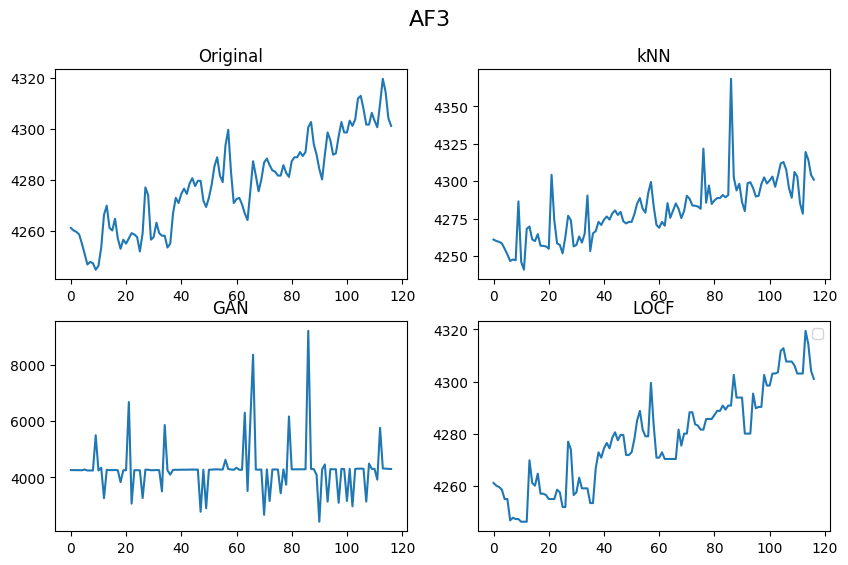

Name AF3
Type Original
Mean 4278.312393162393
Variance 327.1436096573899
Max Diff 0.0
Name AF3
Type kNN
Mean 4280.517378917379
Variance 376.4168012970689
Max Diff 67.86333333333369
Name AF3
Type GAN
Mean 4292.10803535657
Variance 756383.7932254948
Max Diff 4917.615
Name AF3
Type LOCF
Mean 4278.577692307692
Variance 328.4707076090297
Max Diff 10.67199999999957


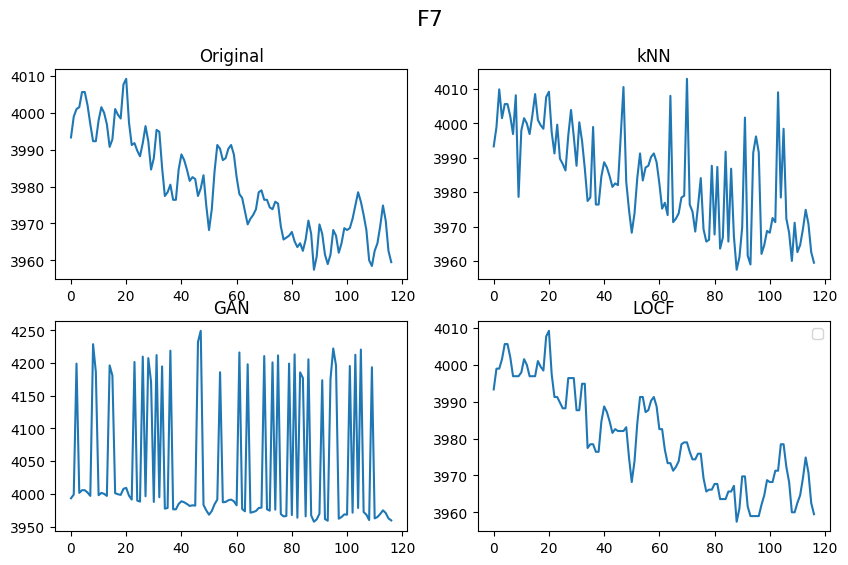

Name F7
Type Original
Mean 3979.9257264957264
Variance 173.94514754912728
Max Diff 0.0
Name F7
Type kNN
Mean 3984.10698005698
Variance 213.745524783078
Max Diff 38.29333333333352
Name F7
Type GAN
Mean 4043.189501118456
Variance 10200.868766820573
Max Diff 269.7761132812502
Name F7
Type LOCF
Mean 3980.1027777777776
Variance 183.18228228869899
Max Diff 7.699999999999818


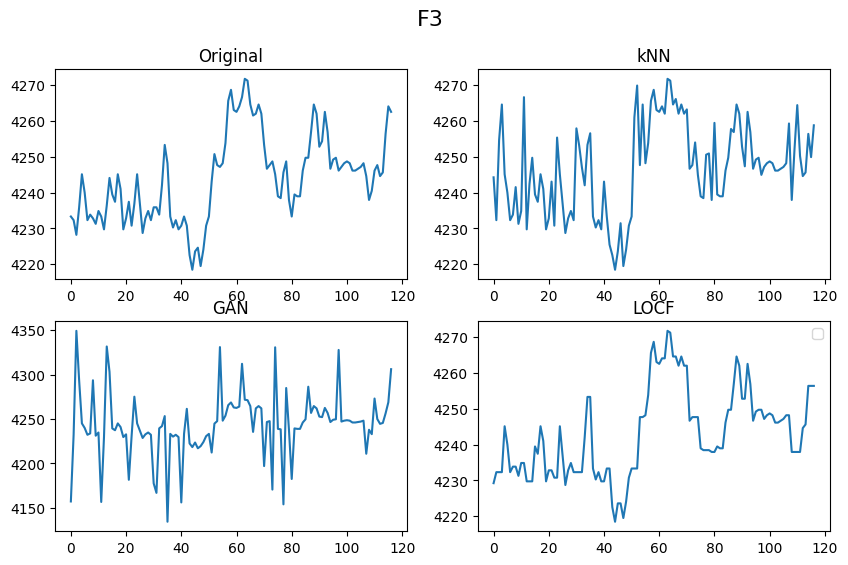

Name F3
Type Original
Mean 4243.914102564102
Variance 145.28483274161758
Max Diff 0.0
Name F3
Type kNN
Mean 4246.910569800571
Variance 158.57389122328527
Max Diff 33.33666666666704
Name F3
Type GAN
Mean 4243.929528912928
Variance 1273.369430337519
Max Diff 121.15132812499996
Name F3
Type LOCF
Mean 4243.441688034188
Variance 144.32670122817544
Max Diff 10.600000000000364


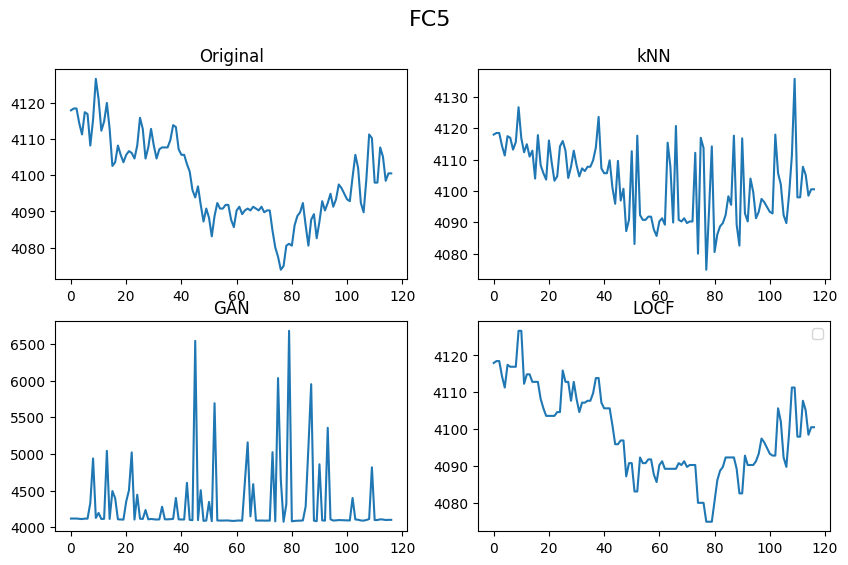

Name FC5
Type Original
Mean 4098.55811965812
Variance 130.12428364380082
Max Diff 0.0
Name FC5
Type kNN
Mean 4102.725982905983
Variance 135.8589421725463
Max Diff 39.82666666666637
Name FC5
Type GAN
Mean 4312.192647819845
Variance 233645.25353805895
Max Diff 2596.9612109375
Name FC5
Type LOCF
Mean 4098.803461538461
Variance 132.82416519486347
Max Diff 11.960000000000036


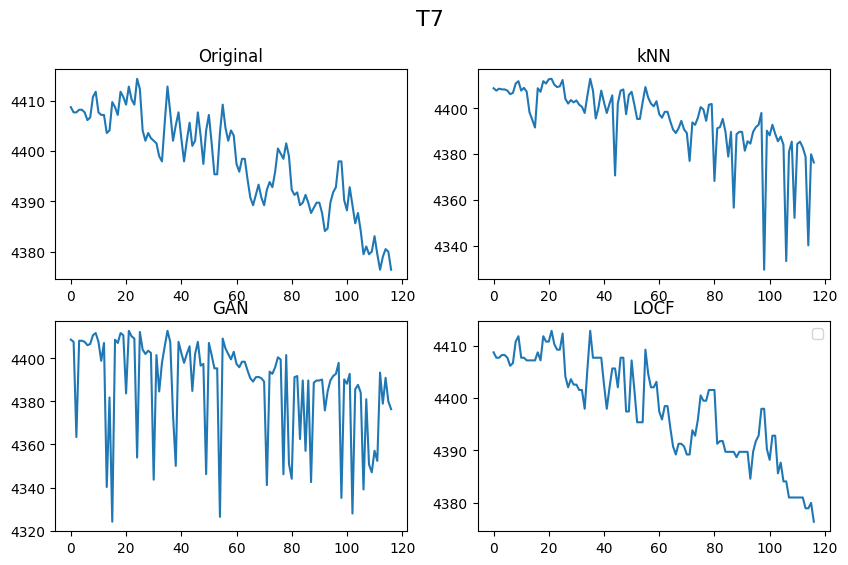

Name T7
Type Original
Mean 4397.838803418803
Variance 92.40736438015982
Max Diff 0.0
Name T7
Type kNN
Mean 4395.187037037036
Variance 225.19123395589207
Max Diff 68.20999999999913
Name T7
Type GAN
Mean 4387.637954059829
Variance 506.5188110692792
Max Diff 85.64332031249978
Name T7
Type LOCF
Mean 4397.983547008546
Variance 92.01808236175074
Max Diff 5.639999999999418


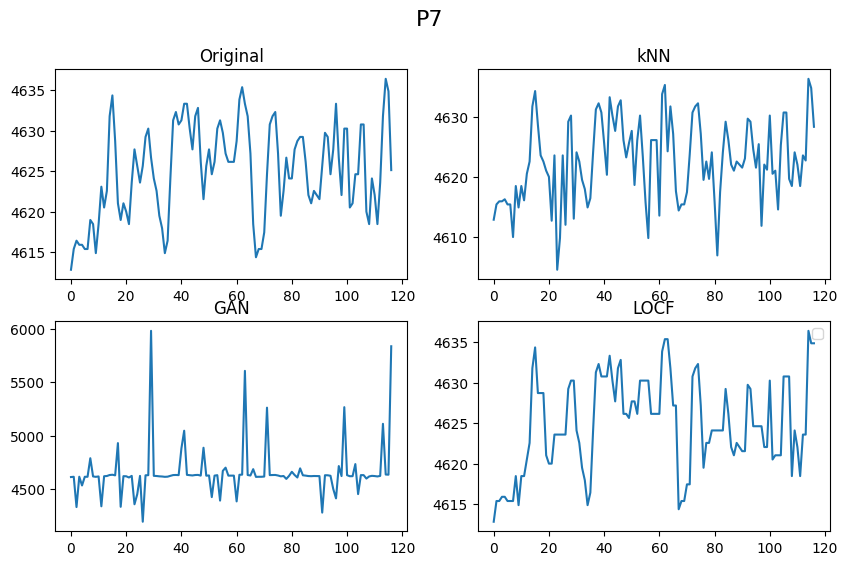

Name P7
Type Original
Mean 4625.004871794872
Variance 32.338604470743064
Max Diff 0.0
Name P7
Type kNN
Mean 4622.618945868947
Variance 45.421628803338315
Max Diff 23.246666666666897
Name P7
Type GAN
Mean 4657.005529680822
Variance 56088.32376665063
Max Diff 1352.0253125
Name P7
Type LOCF
Mean 4624.886410256411
Variance 30.420162797502
Max Diff 9.99499999999989


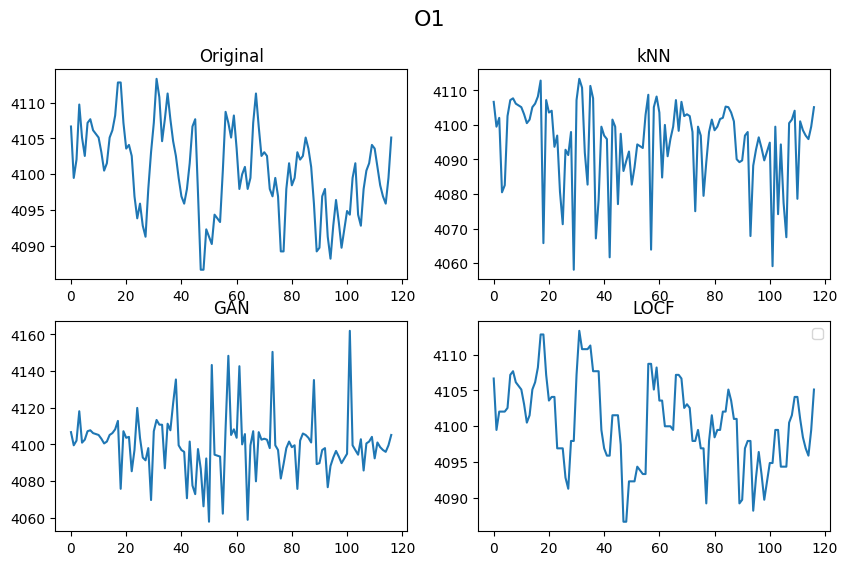

Name O1
Type Original
Mean 4100.364102564103
Variance 37.67957975016427
Max Diff 0.0
Name O1
Type kNN
Mean 4094.8602279202278
Variance 148.68556291101544
Max Diff 47.006666666666206
Name O1
Type GAN
Mean 4100.115799863114
Variance 269.8085457082993
Max Diff 67.64634765624987
Name O1
Type LOCF
Mean 4100.315897435898
Variance 33.215266549784836
Max Diff 8.883333333333212


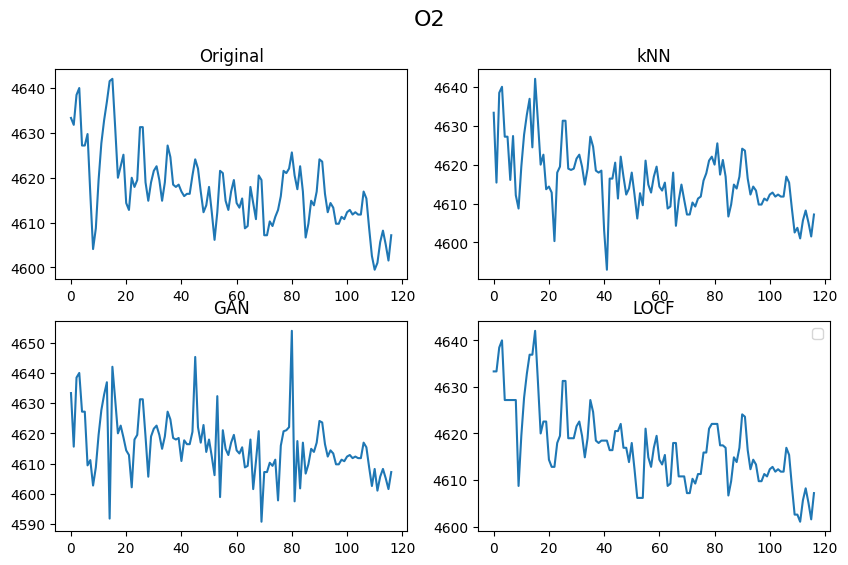

Name O2
Type Original
Mean 4617.343418803419
Variance 71.10019685879159
Max Diff 0.0
Name O2
Type kNN
Mean 4616.116267806268
Variance 70.86966536797605
Max Diff 22.909999999999854
Name O2
Type GAN
Mean 4615.925301315438
Variance 106.56855836274441
Max Diff 49.776328124999964
Name O2
Type LOCF
Mean 4617.001623931625
Variance 67.26437172182061
Max Diff 11.113333333332776


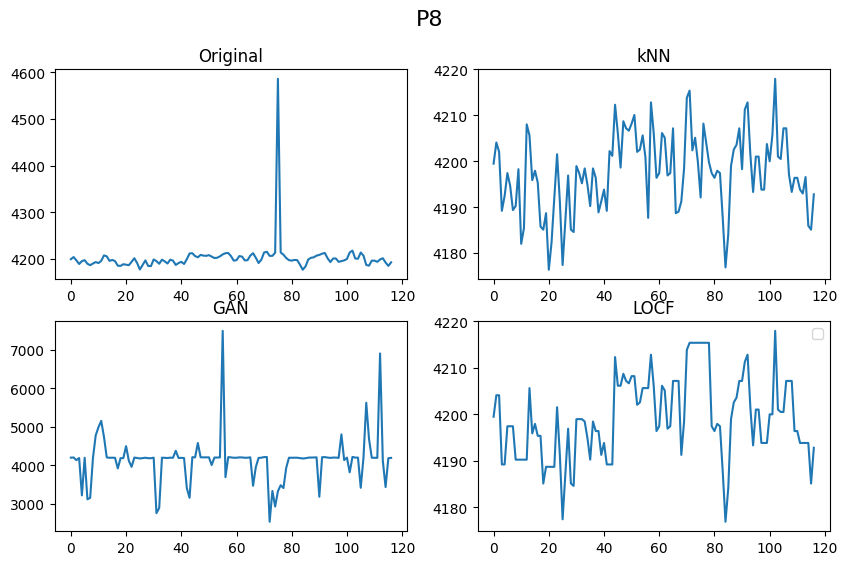

Name P8
Type Original
Mean 4202.2047008547
Variance 1347.677371919057
Max Diff 0.0
Name P8
Type kNN
Mean 4197.6185470085475
Variance 70.6415054861571
Max Diff 394.0133333333333
Name P8
Type GAN
Mean 4136.086880675748
Variance 360114.70107723796
Max Diff 3288.61009765625
Name P8
Type LOCF
Mean 4199.025085470084
Variance 62.44085972203994
Max Diff 379.7399999999998


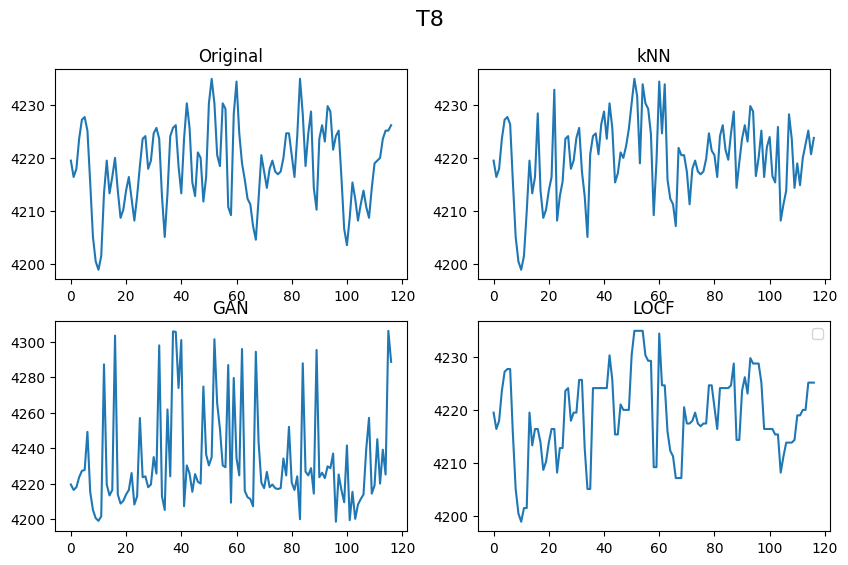

Name T8
Type Original
Mean 4218.435726495727
Variance 57.60013045510963
Max Diff 0.0
Name T8
Type kNN
Mean 4219.982905982906
Variance 52.0769150120531
Max Diff 20.50999999999931
Name T8
Type GAN
Mean 4232.672329894498
Variance 802.2245943188728
Max Diff 89.77111328125011
Name T8
Type LOCF
Mean 4219.540384615384
Variance 52.41309738293576
Max Diff 14.876666666667006


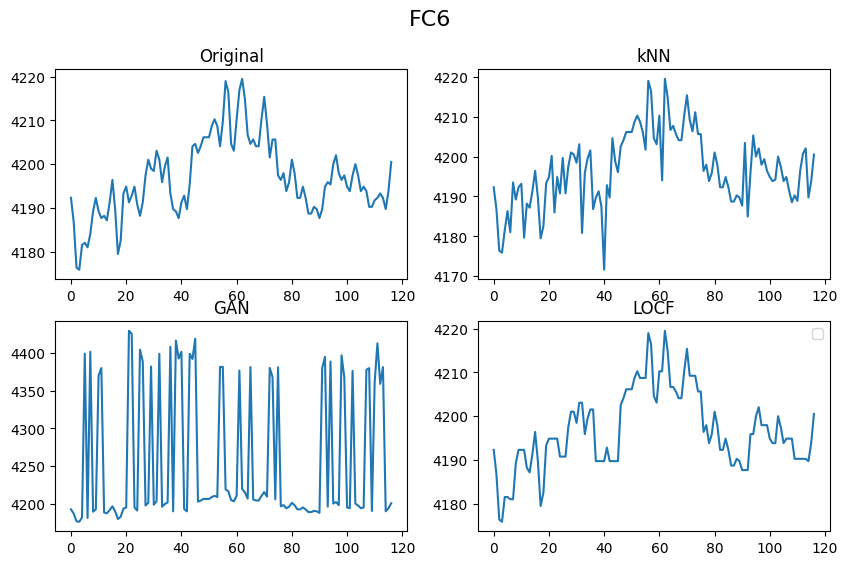

Name FC6
Type Original
Mean 4196.730427350427
Variance 76.5449254583977
Max Diff 0.0
Name FC6
Type kNN
Mean 4196.680997150997
Variance 84.2483751690328
Max Diff 22.90333333333365
Name FC6
Type GAN
Mean 4256.604095719818
Variance 8066.896032809933
Max Diff 238.39675781250025
Name FC6
Type LOCF
Mean 4196.949743589743
Variance 78.05438884213675
Max Diff 8.03666666666686


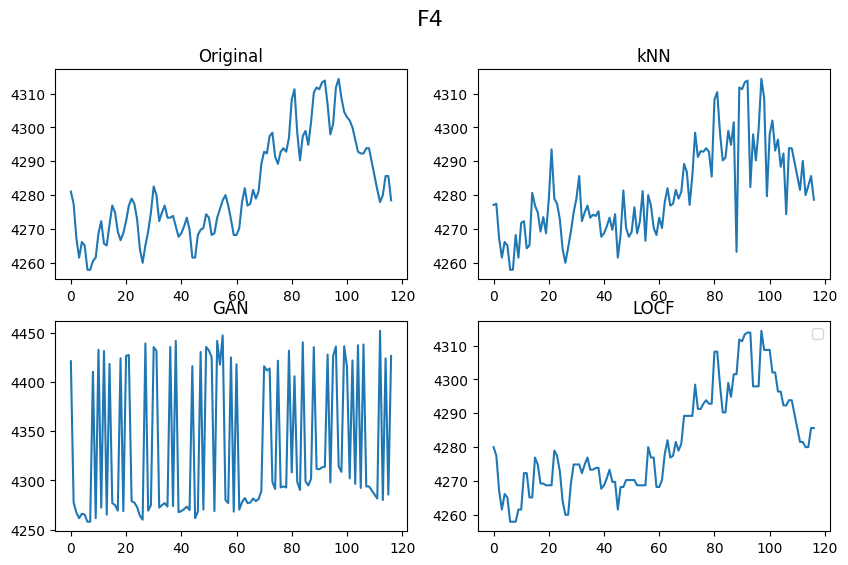

Name F4
Type Original
Mean 4282.0252991453
Variance 220.33112063700742
Max Diff 0.0
Name F4
Type kNN
Mean 4280.965868945869
Variance 180.60054884132498
Max Diff 47.01333333333423
Name F4
Type GAN
Mean 4334.144527076656
Variance 5149.5445416381035
Max Diff 174.25849609375018
Name F4
Type LOCF
Mean 4281.7843162393165
Variance 217.32547485298292
Max Diff 8.543333333333976


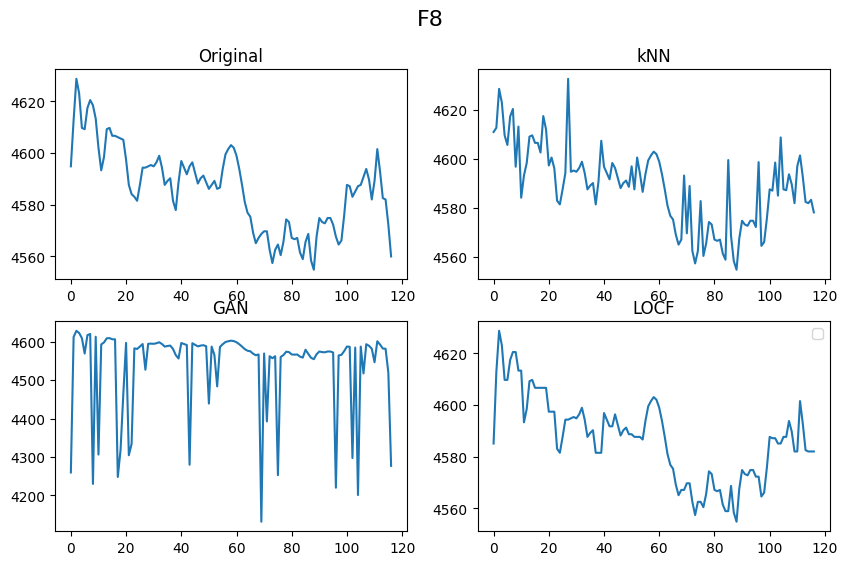

Name F8
Type Original
Mean 4586.381452991454
Variance 256.39645002556705
Max Diff 0.0
Name F8
Type kNN
Mean 4589.0903988604
Variance 263.79287505458404
Max Diff 38.46333333333314
Name F8
Type GAN
Mean 4539.728290264423
Variance 11833.68378275088
Max Diff 437.08035156250025
Name F8
Type LOCF
Mean 4586.6226495726505
Variance 256.3305336848924
Max Diff 8.720000000000255


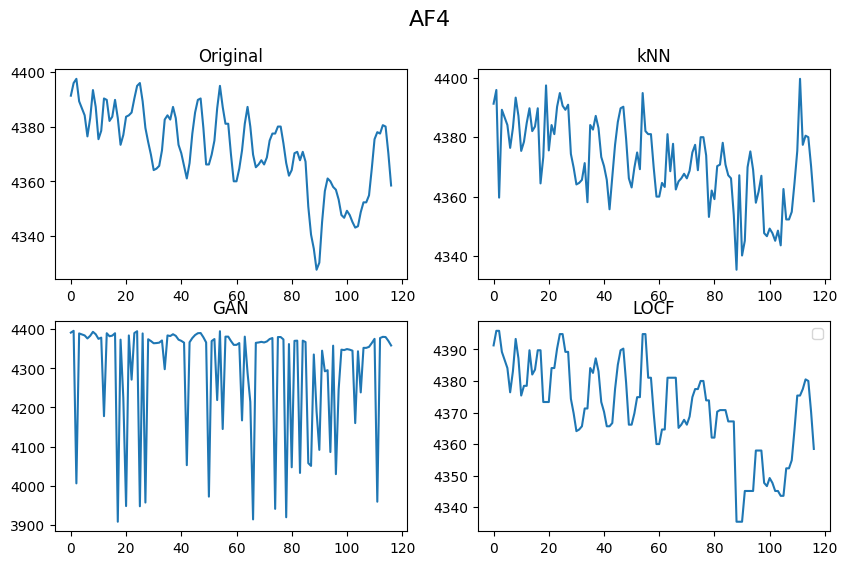

Name AF4
Type Original
Mean 4371.602136752137
Variance 226.2467432975377
Max Diff 0.0
Name AF4
Type kNN
Mean 4371.762706552707
Variance 186.57698042385985
Max Diff 39.48999999999978
Name AF4
Type GAN
Mean 4296.1841717581465
Variance 19734.79144323239
Max Diff 475.3439160156249
Name AF4
Type LOCF
Mean 4371.455170940171
Variance 205.41800979983776
Max Diff 11.61999999999989


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

col_arr = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1',
           'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Timestamp']

df = pd.DataFrame(columns=['Name', 'Type', 'Mean', 'Variance', 'Max Diff', 'Num Diffs'])
for i in range(14):

  fig, axs = plt.subplots(2, 2,figsize=(10, 6))
  fig.suptitle(f'{col_arr[i]}', fontsize=16)

  n = random.randint(0,128)

  axs[0,0].plot(X1[n, :, i])
  axs[0,0].set_title('Original')
  axs[0,1].plot(X2[n, :, i])
  axs[0,1].set_title('kNN')
  axs[1,0].plot(X3[n, :, i])
  axs[1,0].set_title('GAN')
  axs[1,1].plot(X4[n, :, i])
  axs[1,1].set_title('LOCF')
  plt.legend()
  plt.show()

  for method in ['Original', 'kNN', 'GAN', 'LOCF']:
    if method == 'Original':
      X = X1
    elif method == 'kNN':
      X = X2
    elif method == 'GAN':
      X = X3
    elif method == 'LOCF':
      X = X5

    print(f'Name {col_arr[i]}',
          f'Type {method}',
          f'Mean {X[n,:,i].mean()}',
          f'Variance {X[n,:,i].var()}',
          f'Max Diff {np.max(np.abs(X[n, :, i] - X1[n, :, i]))}', sep='\n')

In [ ]:
# datasets = {
#     'original': X.to_numpy(),                         X1
#     'kNN-MCAR': knn_data_mcar,                        X2
#     'kNN-MAR': knn_data_mar,
#     'kNN-MNAR': knn_data_mnar,
#     'interpolation-MCAR': interpolated_data_mcar,     X3
#     'interpolation-MAR': interpolated_data_mar,
#     'interpolation-MNAR': interpolated_data_mnar,
#     'LOCF-MCAR': locf_data_mcar,                      X4
#     'LOCF-MAR': locf_data_mar,
#     'LOCF-MNAR': locf_data_mnar,
#     'GAN-MCAR': gan_data_mcar,                        X5
#     'GAN-MAR': gan_data_mar,
#     'GAN-MNAR': gan_data_mnar,
# }

In [ ]:
num_samples = 50
size_samp = 5
output_dict = {}

In [ ]:
null_distances = []
for sample in tqdm(range(num_samples)):
    samp1, samp2 = [], []
    rsam = random.randint(0, 14)  # Assuming 15 sensors (0-14)
    for i in range(size_samp):
        rts1 = random.randint(0, num_series - 1)
        rts2 = random.randint(0, num_series - 1)
        samp1.extend(X1[rts1, :, rsam])
        samp2.extend(X1[rts2, :, rsam])
    dgm1 = get_persistence_search(samp1, verbose=False)
    dgm2 = get_persistence_search(samp2, verbose=False)
    null_distances.append(bottleneck_dist(dgm1[0], dgm2[0]))

null_distribution = np.array(null_distances)

In [ ]:
null_distances = []
for sample in tqdm(range(num_samples)):
    samp1, samp2 = [], []
    rsam = random.randint(0, 14)  # Assuming 15 sensors (0-14)
    for i in range(size_samp):
        rts1 = random.randint(0, num_series - 1)
        rts2 = random.randint(0, num_series - 1)
        samp1.extend(X1[rts1, :, rsam])
        samp2.extend(X1[rts2, :, rsam])
    dgm1 = get_persistence(samp1, verbose=False)
    dgm2 = get_persistence(samp2, verbose=False)
    null_distances.append(bottleneck_dist(dgm1[0], dgm2[0]))

null_distribution = np.array(null_distances)

100%|██████████| 50/50 [00:43<00:00,  1.16it/s]


In [ ]:
null_distribution

array([5.20712948e+000, 4.40937500e+001, 1.17267370e+001, 8.83416939e+000,
       4.16754198e+000, 1.43854834e+003, 2.67938900e+000, 3.41018391e+000,
       3.75936508e+001, 2.39084625e+000, 7.39235046e+002, 8.70937157e+000,
       1.47286625e+001, 1.08766155e+001, 9.46689209e+002, 5.98559666e+000,
       5.47019386e+000, 1.54581852e+001, 2.21458154e+003, 1.28780042e+003,
       5.47180786e+002, 1.52433703e+005, 1.02405710e+001, 1.46004744e+001,
       1.19195166e+001, 5.87233925e+000, 1.72038817e-308, 1.43701248e+001,
       1.95764656e+001, 1.72038817e-308, 2.78704872e+001, 2.12095547e+000,
       1.72038817e-308, 1.16339293e+001, 2.88484211e+001, 4.12048187e+001,
       1.09657574e+000, 1.72038817e-308, 8.83914185e+000, 1.65417957e+000,
       8.64326477e+000, 3.28820229e+000, 6.40514088e+000, 2.61794147e+001,
       1.04608183e+001, 2.20020180e+001, 2.62568111e+001, 8.15825176e+000,
       9.09104187e+002, 7.03878593e+000])

In [ ]:
# for method in ['knn_data_mcar', 'interpolated_data_mcar', 'locf_data_mcar', 'gan_data_mcar',
#                'knn_data_mar', 'interpolated_data_mar', 'locf_data_mar', 'gan_data_mar', 'knn_data_mnar', 'interpolated_data_mnar','locf_data_mnar','gan_data_mnar']
for method in ['knn-mcar', 'interpolation-mcar', 'locf-mcar', 'gain-mcar', 'knn-mar', 'interpolation-mar', 'locf-mar', 'gain-mar', 'knn-mnar', 'interpolation-mnar','locf-mnar','gain-mnar']:
    output_dist = []
    TS = datasets_climate[method].to_numpy()[:num_series * 5*60].reshape(num_series, 5*60, 15)
    for sample in (pbar := tqdm(range(num_samples))):
        pbar.set_description(f"Method: {method}, Sample: {sample}")
        # Sample from original and method
        samp1, samp2 = [], []
        rsam = random.randint(0, 14)
        for i in range(size_samp):
            rts = random.randint(0, num_series - 1)
            samp1.extend(X1[rts, :, rsam])
            samp2.extend(TS[rts, :, rsam])
        # Compute persistence and distance
        dgm1 = get_persistence(samp1)
        dgm2 = get_persistence(samp2)
        output_dist.append(bottleneck_dist(dgm1[0], dgm2[0]))
    output_dict[method] = output_dist

    #print(bottleneck_dist((dgm1, samp1), (dgm2, samp2)))
    # get_persistence(samp1, verbose=False)

NameError: name 'datasets_climate' is not defined

In [ ]:
#eeg
for method in ['knn_data_mcar', 'interpolated_data_mcar', 'locf_data_mcar', 'gan_data_mcar',
               'knn_data_mar', 'interpolated_data_mar', 'locf_data_mar', 'gan_data_mar', 'knn_data_mnar', 'interpolated_data_mnar','locf_data_mnar','gan_data_mnar']:
# for method in ['knn-mcar', 'interpolation-mcar', 'locf-mcar', 'gain-mcar', 'knn-mar', 'interpolation-mar', 'locf-mar', 'gain-mar', 'knn-mnar', 'interpolation-mnar','locf-mnar','gain-mnar']:
    output_dist = []
    TS = datasets[method].to_numpy()[:num_series * 117].reshape(num_series, 117, 15)
    for sample in (pbar := tqdm(range(num_samples))):
        pbar.set_description(f"Method: {method}, Sample: {sample}")
        # Sample from original and method
        samp1, samp2 = [], []
        rsam = random.randint(0, 14)
        for i in range(size_samp):
            rts = random.randint(0, num_series - 1)
            samp1.extend(X1[rts, :, rsam])
            samp2.extend(TS[rts, :, rsam])
        # Compute persistence and distance
        dgm1 = get_persistence(samp1)
        dgm2 = get_persistence(samp2)
        output_dist.append(bottleneck_dist(dgm1[0], dgm2[0]))
    output_dict[method] = output_dist

    #print(bottleneck_dist((dgm1, samp1), (dgm2, samp2)))
    # get_persistence(samp1, verbose=False)

Method: gan_data_mnar, Sample: 49: 100%|██████████| 50/50 [00:30<00:00,  1.64it/s]


In [ ]:
from scipy.stats import trim_mean
results = {}
for method, distances in output_dict.items():
    print(distances)
    observed_mean = trim_mean(distances, proportiontocut=0.05)
    p_value = monte_carlo_pvalue(observed_mean, null_distribution)
    results[method] = {'mean': observed_mean, 'p_value': p_value}

[1.280061275237537e-308, 7.625497817993164, 21.607412338256836, 10.90283203125, 9.563444137573242, 6.9333391189575195, 8.961959838867188, 1.8925199508666992, 18.303096771240234, 1.720388167524275e-308, 20.26203155517578, 3.036971092224121, 1.8911972045898438, 85.36947631835938, 3.2863540649414062, 3.8811683654785156, 1.9758110046386719, 1.1916093826293945, 3.905223846435547, 4.288702964782715, 1.9534692764282227, 2.439305305480957, 1.8872699737548828, 56.071205139160156, 4.008668899536133, 10.663888931274414, 20.856914520263672, 23.517101287841797, 8.403945922851562, 1.5067682266235352, 5.120969772338867, 2.712635040283203, 2.4688234329223633, 2.9131650924682617, 5.554569244384766, 5.388980865478516, 5.299068450927734, 4.32469367980957, 1.720388167524275e-308, 1.6674327850341797, 72.8216552734375, 6.613252639770508, 1.720388167524275e-308, 15.17340087890625, 1.5239877700805664, 4.374032974243164, 1.280061275237537e-308, 1.1710972785949707, 11.154876708984375, 2.456378936767578]
[4.3202

In [ ]:
methods = list(results.keys())
raw_p = [results[method]['p_value'] for method in methods]


In [ ]:
print(methods)

['knn-mcar', 'interpolation-mcar', 'locf-mcar', 'gain-mcar', 'knn-mar', 'interpolation-mar', 'locf-mar', 'gain-mar', 'knn-mnar', 'interpolation-mnar', 'locf-mnar', 'gain-mnar']


In [ ]:
report = []
for method in methods:
    report.append({
        'Method': method,
        'Mean Distance': results[method]['mean'],
        'Raw p-value': results[method]['p_value'],
        'Significant (α=0.05)': results[method]['p_value'] < 0.05
    })

In [ ]:
#climate report
df_report_climate = pd.DataFrame(report)
print(df_report_climate)

                    Method  Mean Distance  Raw p-value  Significant (α=0.05)
0            knn_data_mcar     123.061055     0.320017                 False
1   interpolated_data_mcar     123.061055     0.320327                 False
2           locf_data_mcar     123.061055     0.317247                 False
3            gan_data_mcar     123.061055     0.317787                 False
4             knn_data_mar     123.061055     0.318247                 False
5    interpolated_data_mar     123.061055     0.320647                 False
6            locf_data_mar     123.061055     0.319637                 False
7             gan_data_mar     123.061055     0.318777                 False
8            knn_data_mnar     123.061055     0.318637                 False
9   interpolated_data_mnar     123.061055     0.320397                 False
10          locf_data_mnar     123.061055     0.319297                 False
11           gan_data_mnar     123.061055     0.320447                 False

In [ ]:
df_report = pd.DataFrame(report)
print(df_report)

                    Method  Mean Distance  Raw p-value  Significant (α=0.05)
0            knn_data_mcar       7.363806     0.642194                 False
1   interpolated_data_mcar       2.776711     0.817802                 False
2           locf_data_mcar       4.338938     0.762242                 False
3            gan_data_mcar     458.513645     0.160388                 False
4             knn_data_mar      13.229919     0.420356                 False
5    interpolated_data_mar      23.012155     0.300197                 False
6            locf_data_mar       5.059785     0.759722                 False
7             gan_data_mar     282.552017     0.159488                 False
8            knn_data_mnar      19.891229     0.316597                 False
9   interpolated_data_mnar       4.432410     0.758772                 False
10          locf_data_mnar      14.971305     0.360106                 False
11           gan_data_mnar   58036.588579     0.019930                  True

# Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pickle
import copy
# datasets = {
#     "original": pd.read_csv("/content/eeg_eye_state_full.csv")
# }
# with open ('/content/imputed_datasets_eeg.pkl', 'rb') as file:
#     data = pickle.load(file)

for key, value in data.items():
    datasets[key] = value

import pprint
# pprint.pprint(datasets['original'])
print(datasets.keys())
datasets_names = {
    'knn_data_mcar' : 'kNN-MCAR',
    'knn_data_mar' : 'kNN-MAR',
    'knn_data_mnar' : 'kNN-MNAR',
    'interpolated_data_mcar' : 'interpolation-MCAR',
    'interpolated_data_mar' : 'interpolation-MAR',
    'interpolated_data_mnar' : 'interpolation-MNAR',
    'locf_data_mcar' : 'LOCF-MCAR',
    'locf_data_mar' : 'LOCF-MAR',
    'locf_data_mnar' : 'LOCF-MNAR',
    'gan_data_mcar' : 'GAN-MCAR',
    'gan_data_mar' : 'GAN-MAR',
    'gan_data_mnar' : 'GAN-MNAR',
}
datasets_v1 = copy.deepcopy(datasets)
# datasets_formatted = dict()
#replace datasets names in datasets with datasets_names
for key, value in datasets.items():
    if key in datasets_names:
        datasets_v1[datasets_names[key]] = value
        del datasets_v1[key]
print(f'datasets names after formating {datasets_v1.keys()}')
import random

dict_keys(['original', 'knn_data_mcar', 'knn_data_mar', 'knn_data_mnar', 'interpolated_data_mcar', 'interpolated_data_mar', 'interpolated_data_mnar', 'locf_data_mcar', 'locf_data_mar', 'locf_data_mnar', 'gan_data_mcar', 'gan_data_mar', 'gan_data_mnar'])
datasets names after formating dict_keys(['original', 'kNN-MCAR', 'kNN-MAR', 'kNN-MNAR', 'interpolation-MCAR', 'interpolation-MAR', 'interpolation-MNAR', 'LOCF-MCAR', 'LOCF-MAR', 'LOCF-MNAR', 'GAN-MCAR', 'GAN-MAR', 'GAN-MNAR'])


In [ ]:
num_series = 14980//117
# num_samples = 5
num_samples = 50
size_samp = 5
output_dict = {}

X1 = datasets_v1['original'].to_numpy()[:num_series * 117].reshape(num_series, 117,15)
X2 = datasets_v1['kNN-MCAR'].to_numpy()[:num_series * 117].reshape(num_series, 117,15)
X3 = datasets_v1['GAN-MCAR'].to_numpy()[:num_series * 117].reshape(num_series, 117,15)
X4 = datasets_v1['LOCF-MCAR'].to_numpy()[:num_series * 117].reshape(num_series, 117,15)
X5 = datasets_v1['interpolation-MCAR'].to_numpy()[:num_series * 117].reshape(num_series, 117,15)

In [ ]:
import random
random.seed(42)
import os
import pandas as pd
import numpy as np
import pickle
# from gtda.plotting import plot_point_cloud # Removing this import
from gtda.time_series import SingleTakensEmbedding
from gtda.homology import VietorisRipsPersistence
from sklearn.decomposition import PCA
import plotly.graph_objects as go


# Load the datasets
datasets = {
    "original": pd.read_csv("/content/eeg_eye_state_full.csv")
}
with open ('/content/imputed_datasets_eeg.pkl', 'rb') as file:
    data = pickle.load(file)

for key, value in data.items():
    datasets[key] = value

# Rename datasets
datasets_names = {
    'knn_data_mcar' : 'kNN-MCAR',
    'knn_data_mar' : 'kNN-MAR',
    'knn_data_mnar' : 'kNN-MNAR',
    'interpolated_data_mcar' : 'interpolation-MCAR',
    'interpolated_data_mar' : 'interpolation-MAR',
    'interpolated_data_mnar' : 'interpolation-MNAR',
    'locf_data_mcar' : 'LOCF-MCAR',
    'locf_data_mar' : 'LOCF-MAR',
    'locf_data_mnar' : 'LOCF-MNAR',
    'gan_data_mcar' : 'GAN-MCAR',
    'gan_data_mar' : 'GAN-MAR',
    'gan_data_mnar' : 'GAN-MNAR',
}
datasets_v1 = {}
for key, value in datasets.items():
    if key in datasets_names:
        datasets_v1[datasets_names[key]] = value
    else:
        datasets_v1[key] = value

def get_persistence(ts_vals, mask=None, verbose=False):
  x_nonperiodic = np.linspace(0, len(ts_vals), len(ts_vals))
  y_nonperiodic = ts_vals

  # Apply mask if provided
  if mask is not None:
      y_nonperiodic = y_nonperiodic[~mask]
      x_nonperiodic = x_nonperiodic[~mask]


  embedding_dimension_nonperiodic = 3
  embedding_time_delay_nonperiodic = 16
  stride = 3

  embedder_nonperiodic = SingleTakensEmbedding(
      parameters_type="search",
      n_jobs=-1,
      time_delay=embedding_time_delay_nonperiodic,
      dimension=embedding_dimension_nonperiodic,
      stride=stride,
  )

  y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(y_nonperiodic)

  # Ensure there are enough samples for PCA after masking and embedding
  if y_nonperiodic_embedded.shape[0] < 3:
      print("Not enough data points after masking and embedding to perform PCA with 3 components.")
      return None # Or handle as appropriate

  pca = PCA(n_components=3)
  y_nonperiodic_embedded = pca.fit_transform(y_nonperiodic_embedded)


  if verbose:
    print("Time Series visualized")
    fig = go.Figure(data=go.Scatter(x=x_nonperiodic, y=y_nonperiodic))
    fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
    fig.show()
    print("Point cloud for the Time Delay Embedding")
    fig = go.Figure(data=[go.Scatter3d(x=y_nonperiodic_embedded[:, 0], y=y_nonperiodic_embedded[:, 1], z=y_nonperiodic_embedded[:, 2], mode='markers',
                                       marker=dict(
                                           size=4,
                                           color=np.arange(len(y_nonperiodic_embedded)), # Color based on index
                                           colorscale='Viridis', # You can choose a different colorscale
                                           colorbar=dict(title='Point Index')
                                       ))])
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()
    #save fig into foler tda_image
    if not os.path.exists('tda_image'):
        os.makedirs('tda_image')
        fig.write_image("tda_image/point_cloud.png")



  y_nonperiodic_embedded_for_persistence = y_nonperiodic_embedded[None, :, :]
  # 0 - connected components, 1 - loops, 2 - voids
  homology_dimensions = [0, 1, 2]

  nonperiodic_persistence = VietorisRipsPersistence(
      homology_dimensions=homology_dimensions, n_jobs=6
  )
  if verbose:
    print("Persistence diagram for the point cloud")
    nonperiodic_persistence.fit_transform_plot([y_nonperiodic_embedded]); # Pass as a list
  return nonperiodic_persistence.fit_transform([y_nonperiodic_embedded]) # Pass as a list

FileNotFoundError: [Errno 2] No such file or directory: '/content/eeg_eye_state_full.csv'

In [ ]:

def plot_point_cloud_from_dataset(dataset, dataset_name):
    print(dataset_name)
    num_series = 14980//117
    size_samp = 5

    TS = dataset.to_numpy()[:num_series * 117].reshape(num_series, 117, 15)
    rsam = random.randint(0, 14)

    samp1 = []
    for i in range(size_samp):
        rts = random.randint(0, num_series - 1)
        samp1.extend(TS[rts, :, rsam])

    dgm = get_persistence(samp1, verbose=True)

for k,v in datasets.items():
    # print(k)
    plot_point_cloud_from_dataset(v, k)

origianl


ValueError: n_components=3 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

In [ ]:
import random
random.seed(42)
import pandas as pd
import numpy as np
import pickle
from gtda.plotting import plot_point_cloud
from gtda.time_series import SingleTakensEmbedding
from gtda.homology import VietorisRipsPersistence
from sklearn.decomposition import PCA
import plotly.graph_objects as go


# Load the datasets
datasets = {
    "original": pd.read_csv("/content/eeg_eye_state_full.csv")
}
with open ('/content/imputed_datasets_eeg.pkl', 'rb') as file:
    data = pickle.load(file)

for key, value in data.items():
    datasets[key] = value

# Rename datasets
datasets_names = {
    'knn_data_mcar' : 'kNN-MCAR',
    'knn_data_mar' : 'kNN-MAR',
    'knn_data_mnar' : 'kNN-MNAR',
    'interpolated_data_mcar' : 'interpolation-MCAR',
    'interpolated_data_mar' : 'interpolation-MAR',
    'interpolated_data_mnar' : 'interpolation-MNAR',
    'locf_data_mcar' : 'LOCF-MCAR',
    'locf_data_mar' : 'LOCF-MAR',
    'locf_data_mnar' : 'LOCF-MNAR',
    'gan_data_mcar' : 'GAN-MCAR',
    'gan_data_mar' : 'GAN-MAR',
    'gan_data_mnar' : 'GAN-MNAR',
}
datasets_v1 = {}
for key, value in datasets.items():
    if key in datasets_names:
        datasets_v1[datasets_names[key]] = value
    else:
        datasets_v1[key] = value

def get_persistence(ts_vals, verbose=False):
  x_nonperiodic = np.linspace(0, len(ts_vals), len(ts_vals))
  y_nonperiodic = ts_vals

  embedding_dimension_nonperiodic = 3
  embedding_time_delay_nonperiodic = 16
  stride = 3

  embedder_nonperiodic = SingleTakensEmbedding(
      parameters_type="fixed",
      n_jobs=-1,
      time_delay=embedding_time_delay_nonperiodic,
      dimension=embedding_dimension_nonperiodic,
      stride=stride,
  )

  pca = PCA(n_components=3)
  y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(y_nonperiodic)
  y_nonperiodic_embedded = pca.fit_transform(y_nonperiodic_embedded)

  if verbose:
    print("Time Series visualized")
    fig = go.Figure(data=go.Scatter(x=x_nonperiodic, y=y_nonperiodic))
    fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
    fig.show()
    print("Point cloud for the Time Delay Embedding")
    fig = plot_point_cloud(y_nonperiodic_embedded)
    fig.show()


  y_nonperiodic_embedded = y_nonperiodic_embedded[None, :, :]
  # 0 - connected components, 1 - loops, 2 - voids
  homology_dimensions = [0, 1, 2]

  nonperiodic_persistence = VietorisRipsPersistence(
      homology_dimensions=homology_dimensions, n_jobs=6
  )
  if verbose:
    print("Persistence diagram for the point cloud")
    nonperiodic_persistence.fit_transform_plot(y_nonperiodic_embedded);
  return nonperiodic_persistence.fit_transform(y_nonperiodic_embedded)


num_series = 14980//117
size_samp = 50
X1 = datasets_v1['original'].to_numpy()[:num_series * 117].reshape(num_series, 117,15)
TS = datasets_v1['original'].to_numpy()[:num_series * 117].reshape(num_series, 117, 15)
rsam = random.randint(0, 14)

samp1 = []
for i in range(size_samp):
    rts = random.randint(0, num_series - 1)
    samp1.extend(X1[rts, :, rsam])

dgm = get_persistence(samp1, verbose=True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/eeg_eye_state_full.csv'

## Viz for EEG eye

In [ ]:
import copy
datasets_eeg = pd.read_csv('/content/eeg_eye_state_full.csv')

## Viz for Climate data

In [ ]:
with open('/content/datasets.pkl', 'rb') as f:
    datasets_climate = pickle.load(f)
import copy

In [ ]:
!pip install kaleido

In [ ]:
# datasets_intep_mar_v1 = copy.deepcopy(datasets_climate['interpolation-mar'])

num_series = 14980//117
size_samp = 5
# X1 = datasets['original'].to_numpy()[:num_series * (5*60)].reshape(num_series, (5*60),15)
TS = datasets['original'].to_numpy()[:num_series * 117].reshape(num_series, 117, 15)
rsam = random.randint(0, 14)

samp1 = []
for i in range(size_samp):
    rts = random.randint(0, num_series - 1)
    samp1.extend(X1[rts, :, rsam])

dgm = get_persistence(samp1, verbose=True)

Time Series visualized


Point cloud for the Time Delay Embedding


Persistence diagram for the point cloud


In [ ]:
import copy
datasets_climate_raw_v1 = datasets['origianl']

In [ ]:
num_series = 420451//(5*60) #5minutes
size_samp = 5 #or 50
X1 = datasets_climate_raw_v1.to_numpy()[:num_series * (5*60)].reshape(num_series, (5*60),15)
TS = datasets_climate_raw_v1.to_numpy()[:num_series * (5*60)].reshape(num_series, (5*60), 15)
rsam = random.randint(0, 14)

samp1 = []
for i in range(size_samp):
    rts = random.randint(0, num_series - 1)
    samp1.extend(X1[rts, :, rsam])

dgm = get_persistence_search(samp1, verbose=True)

Time Series visualized


Point cloud for the Time Delay Embedding


Persistence diagram for the point cloud


In [ ]:
#imputed datasets vidualization
def plot_point_cloud_from_dataset(dataset, dataset_name):
    print(dataset_name)
    num_series = 420451//(5*60)
    size_samp = 5

    TS = dataset.to_numpy()[:num_series * 5 * 60].reshape(num_series, 5 * 60, 15)
    rsam = random.randint(0, 14)

    samp1 = []
    for i in range(size_samp):
        rts = random.randint(0, num_series - 1)
        samp1.extend(TS[rts, :, rsam])

    dgm = get_persistence(samp1, verbose=True)

In [ ]:
import networkx as nx
import plotly.graph_objects as go

# Number of nodes
n = 5

# Discrete Topology (Fully Disconnected Graph)
G_discrete = nx.empty_graph(n)
pos = nx.circular_layout(G_discrete)  # Position nodes in a circle

# Create node trace
node_x_discrete = [pos[node][0] for node in G_discrete.nodes()]
node_y_discrete = [pos[node][1] for node in G_discrete.nodes()]
node_trace_discrete = go.Scatter(
    x=node_x_discrete, y=node_y_discrete,
    mode='markers',
    marker=dict(size=20, color='blue')
)

# Create figure for discrete topology
fig_discrete = go.Figure(
    data=[node_trace_discrete],
    layout=go.Layout(
        title='Discrete Topology (Fully Disconnected)',
        showlegend=False,
        hovermode='closest',
        margin=dict(b=0, l=0, r=0, t=30),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)

# Indiscrete Topology (Fully Connected Graph)
G_indiscrete = nx.complete_graph(n)
pos = nx.circular_layout(G_indiscrete)

# Create edge trace
edge_x_indiscrete = []
edge_y_indiscrete = []
for edge in G_indiscrete.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x_indiscrete.extend([x0, x1, None])  # None creates line breaks
    edge_y_indiscrete.extend([y0, y1, None])

edge_trace_indiscrete = go.Scatter(
    x=edge_x_indiscrete, y=edge_y_indiscrete,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Create node trace
node_x_indiscrete = [pos[node][0] for node in G_indiscrete.nodes()]
node_y_indiscrete = [pos[node][1] for node in G_indiscrete.nodes()]
node_trace_indiscrete = go.Scatter(
    x=node_x_indiscrete, y=node_y_indiscrete,
    mode='markers',
    marker=dict(size=20, color='blue')
)

# Create figure for indiscrete topology
fig_indiscrete = go.Figure(
    data=[edge_trace_indiscrete, node_trace_indiscrete],
    layout=go.Layout(
        title='Indiscrete Topology (Fully Connected)',
        showlegend=False,
        hovermode='closest',
        margin=dict(b=0, l=0, r=0, t=30),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)

# Display the figures
fig_discrete.show()
fig_indiscrete.show()

In [ ]:
#imputed datasets vidualization
def plot_point_cloud_with_imputed(incomplete_dataset, imputed_dataset, data_mask, dataset_name, TS_incomplete, TS_imputed, mask_data):
    print(f"{dataset_name} - Point cloud with imputed points in red")
    # num_series = 14980//117 EEG Eye State
    # size_samp = 5

    # TS_incomplete = incomplete_dataset.to_numpy()[:num_series * 117].reshape(num_series, 117, 14) # Assuming 14 columns in incomplete data
    # TS_imputed = imputed_dataset.to_numpy()[:num_series * 117].reshape(num_series, 117, 15) # Assuming 15 columns in imputed data
    # mask_data = data_mask.to_numpy()[:num_series * 117].reshape(num_series, 117, 14) # Assuming 14 columns in mask

    # rsam = random.randint(0, 13) # Assuming we are plotting one of the 14 sensor columns

    samp_incomplete = []
    samp_imputed = []
    samp_mask = []
    for i in range(size_samp):
        rts = random.randint(0, num_series - 1)
        samp_incomplete.extend(TS_incomplete[rts, :, rsam])
        samp_imputed.extend(TS_imputed[rts, :, rsam])
        samp_mask.extend(mask_data[rts, :, rsam])

    samp_incomplete = np.array(samp_incomplete)
    samp_imputed = np.array(samp_imputed)
    samp_mask = np.array(samp_mask, dtype=bool)


    # Create color array: red for imputed points (where mask is True), blue for original points
    colors = np.where(samp_mask, 'red', 'blue')

    # Time Delay Embedding and PCA on imputed data
    embedding_dimension_nonperiodic = 3
    embedding_time_delay_nonperiodic = 16
    stride = 3

    embedder_nonperiodic = SingleTakensEmbedding(
        parameters_type="fixed",
        n_jobs=-1,
        time_delay=embedding_time_delay_nonperiodic,
        dimension=embedding_dimension_nonperiodic,
        stride=stride,
    )

    pca = PCA(n_components=3)
    y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(samp_imputed)
    y_nonperiodic_embedded = pca.fit_transform(y_nonperiodic_embedded)

    # Plotting the point cloud with colors
    fig = go.Figure(data=[go.Scatter3d(x=y_nonperiodic_embedded[:, 0], y=y_nonperiodic_embedded[:, 1], z=y_nonperiodic_embedded[:, 2], mode='markers',
                                       marker=dict(
                                           size=4,
                                           color=colors, # Use the color array
                                       ))])
    # fig.update_layout(title=f"Point Cloud for {dataset_name} (Imputed points in red)", margin=dict(l=0, r=0, b=0, t=40))
    fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis_title="0th",
        yaxis_title="1st",
        zaxis_title="2nd"
    )
)

    fig.show()

    # Generate and plot Persistence Diagram for the masked incomplete data
    print(f"{dataset_name} - Persistence Diagram for masked incomplete data")
    dgm_masked = get_persistence(samp_incomplete, mask=samp_mask, verbose=True)

    # Generate and plot Persistence Diagram for the imputed data
    print(f"{dataset_name} - Persistence Diagram for imputed data")
    dgm_imputed = get_persistence(samp_imputed, verbose=True)

In [ ]:
import random
random.seed(42)
import pandas as pd
import numpy as np
import pickle
from gtda.plotting import plot_point_cloud
from gtda.time_series import SingleTakensEmbedding
from gtda.homology import VietorisRipsPersistence
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import os

# Load the datasets
datasets = {
    "original": pd.read_csv("/content/eeg_eye_state_full.csv")
}
with open ('/content/imputed_datasets_eeg.pkl', 'rb') as file:
    data = pickle.load(file)

for key, value in data.items():
    datasets[key] = value

# Rename datasets
datasets_names = {
    'knn_data_mcar' : 'kNN-MCAR',
    'knn_data_mar' : 'kNN-MAR',
    'knn_data_mnar' : 'kNN-MNAR',
    'interpolated_data_mcar' : 'interpolation-MCAR',
    'interpolated_data_mar' : 'interpolation-MAR',
    'interpolated_data_mnar' : 'interpolation-MNAR',
    'locf_data_mcar' : 'LOCF-MCAR',
    'locf_data_mar' : 'LOCF-MAR',
    'locf_data_mnar' : 'LOCF-MNAR',
    'gan_data_mcar' : 'GAN-MCAR',
    'gan_data_mar' : 'GAN-MAR',
    'gan_data_mnar' : 'GAN-MNAR',
}
datasets_v1 = {}
for key, value in datasets.items():
    if key in datasets_names:
        datasets_v1[datasets_names[key]] = value
    else:
        datasets_v1[key] = value

def get_persistence(ts_vals, mask=None, verbose=False):
  x_nonperiodic = np.linspace(0, len(ts_vals), len(ts_vals))
  y_nonperiodic = ts_vals

  # Apply mask if provided
  if mask is not None:
      y_nonperiodic = y_nonperiodic[~mask]
      x_nonperiodic = x_nonperiodic[~mask]

  if len(y_nonperiodic) == 0:
      print("No data points remaining after masking.")
      return None

  embedding_dimension_nonperiodic = 3
  embedding_time_delay_nonperiodic = 16
  stride = 3

  embedder_nonperiodic = SingleTakensEmbedding(
      parameters_type="search",
      n_jobs=-1,
      time_delay=embedding_time_delay_nonperiodic,
      dimension=embedding_dimension_nonperiodic,
      stride=stride,
  )

  y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(y_nonperiodic)

  # Adjust n_components for PCA if necessary
  n_components = min(y_nonperiodic_embedded.shape[0], y_nonperiodic_embedded.shape[1], 3)
  if n_components < 1:
      print("Not enough data points after embedding for PCA.")
      return None

  pca = PCA(n_components=n_components)
  y_nonperiodic_embedded = pca.fit_transform(y_nonperiodic_embedded)


  if verbose:
    print("Time Series visualized")
    fig = go.Figure(data=go.Scatter(x=x_nonperiodic, y=y_nonperiodic))
    fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
    fig.show()
    print("Point cloud for the Time Delay Embedding")
    fig = go.Figure(data=[go.Scatter3d(x=y_nonperiodic_embedded[:, 0], y=y_nonperiodic_embedded[:, 1], z=y_nonperiodic_embedded[:, 2], mode='markers',
                                       marker=dict(
                                           size=4,
                                           color=np.arange(len(y_nonperiodic_embedded)), # Color based on index
                                           colorscale='Viridis', # You can choose a different colorscale
                                           colorbar=dict(title='Point Index')
                                       ))])
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()
    #save fig into foler tda_image
    if not os.path.exists('tda_image'):
        os.makedirs('tda_image')
        fig.write_image("tda_image/point_cloud.png")



  y_nonperiodic_embedded_for_persistence = y_nonperiodic_embedded[None, :, :]
  # 0 - connected components, 1 - loops, 2 - voids
  homology_dimensions = [0, 1, 2]

  nonperiodic_persistence = VietorisRipsPersistence(
      homology_dimensions=homology_dimensions, n_jobs=6
  )
  if verbose:
    print("Persistence diagram for the point cloud")
    nonperiodic_persistence.fit_transform_plot([y_nonperiodic_embedded]); # Pass as a list
  return nonperiodic_persistence.fit_transform([y_nonperiodic_embedded]) # Pass as a list

FileNotFoundError: [Errno 2] No such file or directory: '/content/imputed_datasets_eeg.pkl'

In [ ]:
# Assuming 'datasets_climate' and 'incomp_data' are loaded and contain the necessary data

# Get the imputed dataset for interpolation-mcar
imputed_data_interp_mcar = copy.deepcopy(inputed_data)

# Get the corresponding incomplete data and mask from incomp_data
# Note: The keys in incomp_data are 'mcar', 'mar', 'mnar' and their masks.
# We need to match 'interpolation-mcar' to the correct incomplete data and mask.
# Based on your output, the relevant incomplete data and mask keys seem to be 'mcar' and 'mcar_mask'.
incomplete_data_mcar = copy.deepcopy(mcar_incomplete_data)
mcar_mask_data = copy.deepcopy(mcar_mask)

# Define sampling parameters
num_series = 420451 // (5 * 60)  # Number of 5-minute intervals
size_samp = 50 # Number of 5-minute intervals to sample per plot

TS_incomplete = incomplete_data_mcar.to_numpy()[:num_series * (5 * 60)].reshape(num_series, (5 * 60), 14)
TS_imputed = imputed_data_interp_mcar.to_numpy()[:num_series * (5 * 60)].reshape(num_series, (5 * 60), 14)
mask_data = mcar_mask_data[:num_series * (5 * 60)].reshape(num_series, (5 * 60), 14)

In [ ]:
plot_point_cloud_with_imputed(incomplete_data_mcar, imputed_data_interp_mcar, mcar_mask_data, 'interpolation-mcar', TS_incomplete, TS_imputed, mask_data)

interpolation-mcar - Point cloud with imputed points in red


interpolation-mcar - Persistence Diagram for masked incomplete data


ValueError: n_components=3 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Example config
num_series = 420451 // (5 * 60)  # Number of 5-min intervals
size_samp = 50  # Number of 5-min intervals to sample per plot

# Suppose you already have:
# TS_incomplete  shape (num_series, 5*60, 14)
# TS_imputed     shape (num_series, 5*60, 14)
# mask_data      shape (num_series, 5*60, 14)

# Pick a series index and feature index to plot
series_idx = 0
feature_idx = 0

# Extract
original = TS_incomplete[series_idx, :, feature_idx]
imputed  = TS_imputed[series_idx, :, feature_idx]
mask     = mask_data[series_idx, :, feature_idx].astype(bool)

# x-axis (timestamps)
x_vals = np.arange(len(original))

# Now plot
fig = go.Figure()

# Original signal
fig.add_trace(go.Scatter(
    x=x_vals,
    y=original,
    mode='lines+markers',
    name='Original (Incomplete)',
    line=dict(color='blue')
))

# Masked points (where mask is True)
fig.add_trace(go.Scatter(
    x=x_vals[mask],
    y=original[mask],
    mode='markers',
    name='Masked Points',
    marker=dict(color='red', size=6, symbol='x')
))

# Imputed signal
fig.add_trace(go.Scatter(
    x=x_vals,
    y=imputed,
    mode='lines+markers',
    name='Imputed',
    line=dict(color='green')
))

fig.update_layout(
    title=f"Original, Masked, and Imputed (Series {series_idx}, Feature {feature_idx})",
    xaxis_title="Timestamp",
    yaxis_title="Value"
)

fig.show()


In [ ]:
!wget -O /content/imputed_datasets_eeg.pkl https://drive.google.com/uc?id=1-k2_d7S2_r95o9wE80wM7e_J5q3p9Y0R&export=download

--2025-07-31 16:33:33--  https://drive.google.com/uc?id=1-k2_d7S2_r95o9wE80wM7e_J5q3p9Y0R
Resolving drive.google.com (drive.google.com)... 173.194.210.100, 173.194.210.102, 173.194.210.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1-k2_d7S2_r95o9wE80wM7e_J5q3p9Y0R [following]
--2025-07-31 16:33:33--  https://drive.usercontent.google.com/download?id=1-k2_d7S2_r95o9wE80wM7e_J5q3p9Y0R
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.210.132|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-31 16:33:33 ERROR 404: Not Found.

